In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# to split the datasets
from sklearn.model_selection import train_test_split

In [34]:
data=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Feature engineering/titanic.csv', usecols=['age' , 'survived'])
data.head() # age-> X, survived->y

,survived,age
0,1,29.0000
1,1,0.9167
2,0,2.0000
3,0,30.0000
4,0,25.0000


In [7]:
# let's look at the percentage of NA

data.isnull().mean()

survived    0.000000
age         0.200917
dtype: float64

In [9]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data[['age']],  # predictors
    data['survived'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((916, 1), (393, 1))

In [10]:
# Let's explore the missing data in the train set
# the percentages should be fairly similar to those
# of the whole dataset

X_train.isnull().mean()

age    0.191048
dtype: float64

In [24]:
mean_age= round(X_train.age.mean())  # round() as age can't be float
mean_age

30

In [25]:
median_age=X_train.age.median()
median_age

28.0

In [26]:
age_median= X_train.age.fillna(median_age)
age_median

501     13.0000
588      4.0000
402     30.0000
1193    28.0000
686     22.0000
         ...   
763      0.1667
835     28.0000
1216    28.0000
559     20.0000
684     32.0000
Name: age, Length: 916, dtype: float64

In [27]:
age_mean= X_train.age.fillna(mean_age)
age_mean

501     13.0000
588      4.0000
402     30.0000
1193    30.0000
686     22.0000
         ...   
763      0.1667
835     30.0000
1216    30.0000
559     20.0000
684     32.0000
Name: age, Length: 916, dtype: float64

In [28]:
import seaborn as sns

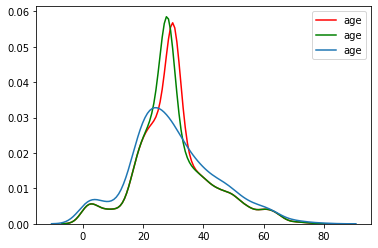

In [29]:
sns.kdeplot(age_mean, color='red')
sns.kdeplot(age_median, color='green')
sns.kdeplot(data.age)